<a href="https://colab.research.google.com/github/ejay34/yandex_praktikum_projects/blob/main/05.%20%D0%92%D1%8B%D0%B1%D0%BE%D1%80%20%D0%BB%D0%BE%D0%BA%D0%B0%D1%86%D0%B8%D0%B8%20%D0%B4%D0%BB%D1%8F%20%D1%81%D0%BA%D0%B2%D0%B0%D0%B6%D0%B8%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выбор локации для скважины

Условный заказчик, добывающая компания ведет разработку по бурению новой скважины. Необходимо определить место проведения работ.

Заказчиком предоставлены наборы данных пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

*Цель исследования:* Построить модель машинного обучения, которая определит регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

*Этапы исследования:*
1. Загрузка и подготовка данных
2. Создание и обучение модели линейой регрессии
3. Определение показателей прибыли для каждого региона
4. Итоговый вывод

*Описание данных:*

Технологический процесс:
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, - Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации)
- Sulphate — сульфат (на данном производстве сульфид натрия)
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов:
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков: [этап].[тип_параметра].[название_параметра]

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span>
            <ul class="toc-item">
                <li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li>
                <li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li>
                <li><span><a href="#Вывод-основной-информации" data-toc-modified-id="Вывод-основной-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод основной информации</a></span></li>
                <li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li>
                <li><span><a href="#Проверка-на-явные-дубликаты" data-toc-modified-id="Проверка-на-явные-дубликаты-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверка на явные дубликаты</a></span></li>
                <li><span><a href="#Поиск-пропущенных-значений" data-toc-modified-id="Поиск-пропущенных-значений-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Поиск пропущенных значений</a></span></li>
                <li><span><a href="#Гистограммы-признаков" data-toc-modified-id="Гистограммы-признаков-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Гистограммы признаков</a></span></li>
                <li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Краткий вывод</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span>
            <ul class="toc-item">
                <li><span><a href="#Создание-функции-обучения-модели" data-toc-modified-id="Создание-функции-обучения-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание функции обучения модели</a></span></li>
                <li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели</a></span></li>
                <li><span><a href="#Вывод-результатов" data-toc-modified-id="Вывод-результатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод результатов</a></span></li>
                <li><span><a href="#Анализ-результатов" data-toc-modified-id="Анализ-результатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ результатов</a></span></li>                
            </ul>
        </li>
        <li><span><a href="#Подготовка-к-расчету-прибыли" data-toc-modified-id="Подготовка-к-расчету-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчету прибыли</a></span>
            <ul class="toc-item">
                <li><span><a href="#Определим-ключевые-значения" data-toc-modified-id="Определим-ключевые-значения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определим ключевые значения</a></span></li>
                <li><span><a href="#Определение-величины-запаса-сырья-для-безубыточной-разработки" data-toc-modified-id="Определение-величины-запаса-сырья-для-безубыточной-разработки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определение величины запаса сырья для безубыточной разработки</a></span></li>
                <li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Краткий вывод</a></span></li>                 
            </ul>
        </li>
        <li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span>
            <ul class="toc-item">
                <li><span><a href="#Создание-функции-расчета-прибыли" data-toc-modified-id="Создание-функции-расчета-прибыли-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание функции расчета прибыли</a></span></li>
                <li><span><a href="#Создание-функции-расчета-целевых-показателей" data-toc-modified-id="Создание-функции-расчета-целевых-показателей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создание функции расчета целевых показателей</a></span></li>
                <li><span><a href="#Определение-показателей-прибыли-для-региона-1" data-toc-modified-id="Определение-показателей-прибыли-для-региона-1-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определение показателей прибыли для региона 1</a></span></li>
                <li><span><a href="#Определение-показателей-прибыли-для-региона-2" data-toc-modified-id="Определение-показателей-прибыли-для-региона-2-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение показателей прибыли для региона 2</a></span></li>
                <li><span><a href="#Определение-показателей-прибыли-для-региона-3" data-toc-modified-id="Определение-показателей-прибыли-для-региона-3-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Определение показателей прибыли для региона 3</a></span></li>                
                <li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Краткий вывод</a></span></li>
            </ul>
        </li>   
        <li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li>
        <li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li>
    </ul>
</div>

## Загрузка и подготовка данных

### Импорт необходимых библиотек

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None

### Загрузка данных

In [2]:
# Загрузим данные из csv-файла в переменную df_1
try:
    df_1 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

# Загрузим данные из csv-файла в переменную df_2
try:
    df_2 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')

# Загрузим данные из csv-файла в переменную df_3
try:
    df_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

### Вывод основной информации

In [3]:
# Выведем информацию и датасетах
print(f'\nРазмерность исходных данных первого региона: \n\tобъектов - {df_1.shape[0]}, признаков - {df_1.shape[1]}\n')
print(df_1.sample(5))
print()
print(df_1.dtypes)

print(f'\nРазмерность исходных данных второго региона: \n\tобъектов - {df_2.shape[0]}, признаков - {df_2.shape[1]}\n')
print(df_2.sample(5))
print()
print(df_2.dtypes)

print(f'\nРазмерность исходных данных третьего региона: \n\tобъектов - {df_3.shape[0]}, признаков - {df_3.shape[1]}\n')
print(df_3.sample(5))
print()
print(df_3.dtypes)


Размерность исходных данных первого региона: 
	объектов - 100000, признаков - 5

          id        f0        f1        f2     product
44578  owXlp  1.596368 -0.380288  6.544657   57.349140
92839  ex6t0  0.162020 -0.057048 -0.461012   72.323787
3569   cDxkG  0.024067 -0.000198  0.304200  103.352304
17292  OkcJr -0.071363  0.473235  6.279500  151.935056
22378  ZById  0.682213  0.639399  3.575636   48.412262

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Размерность исходных данных второго региона: 
	объектов - 100000, признаков - 5

          id         f0        f1        f2     product
84643  1CGKp   6.853531 -4.188275  4.988448  134.766305
87946  thDqF -12.634626 -4.860937  0.002199    3.179103
68304  IJETR -13.223425 -8.275486 -0.004235    3.179103
65887  X9Qee   9.713563 -9.860361  3.001495   80.859783
1660   C7cnc   0.522730 -0.189695  2.009415   53.906522

id          object
f0         float64
f1         float64
f2

### Проверка на мультиколлинеарность

<ipython-input-4-2d86096f760f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(), cmap="YlGnBu", annot=True)


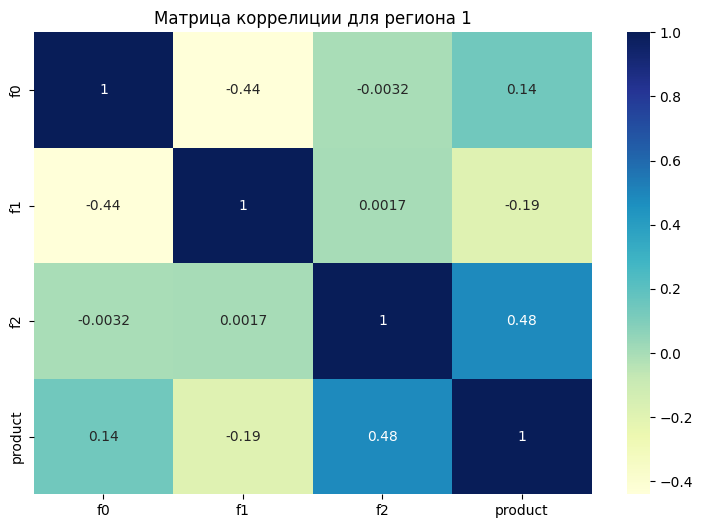

In [4]:
# Для региона 1
plt.figure(figsize=(9, 6))
sns.heatmap(df_1.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица коррелиции для региона 1')
plt.show()

<ipython-input-5-bb1d25f9fa33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)


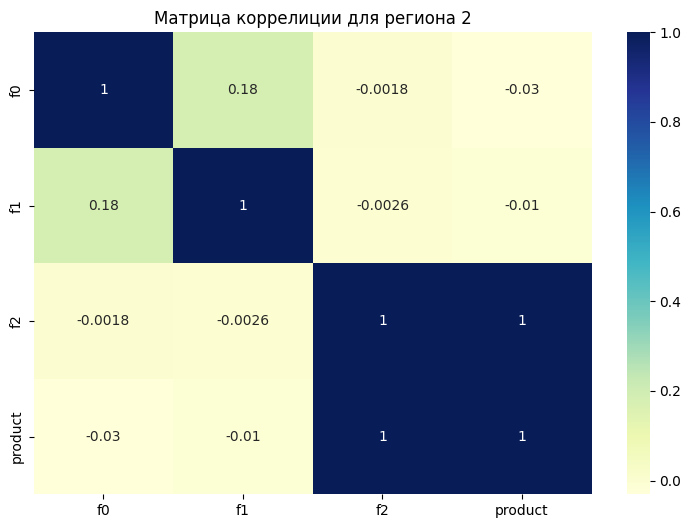

In [5]:
# Для региона 2
plt.figure(figsize=(9, 6))
sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица коррелиции для региона 2')
plt.show()

<ipython-input-6-0c53bb5a4819>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_3.corr(), cmap="YlGnBu", annot=True)


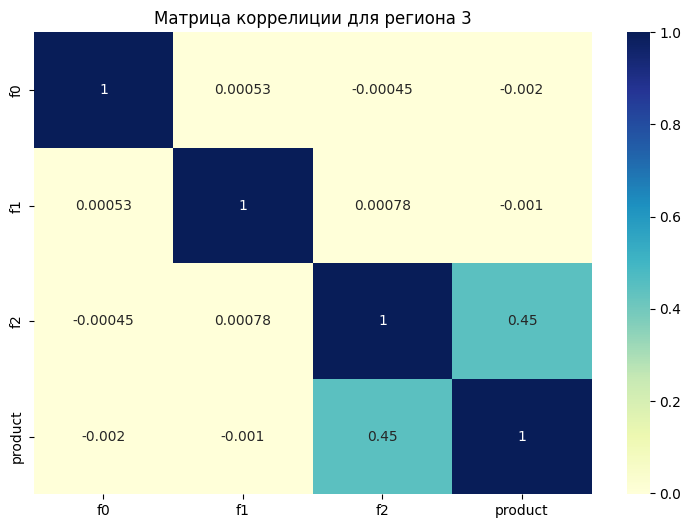

In [6]:
# Для региона 3
plt.figure(figsize=(9, 6))
sns.heatmap(df_3.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица коррелиции для региона 3')
plt.show()

### Проверка на явные дубликаты

In [7]:
# Выполним проверку на явные дубликаты в df_1
print(f'\nЯвных дубликатов в данных первого региона: {df_1.duplicated().sum()}')

# Выполним проверку на явные дубликаты в df_2
print(f'\nЯвных дубликатов в данных второго региона: {df_2.duplicated().sum()}')

# Выполним проверку на явные дубликаты в df_3
print(f'\nЯвных дубликатов в данных третьего региона: {df_3.duplicated().sum()}')


Явных дубликатов в данных первого региона: 0

Явных дубликатов в данных второго региона: 0

Явных дубликатов в данных третьего региона: 0


In [8]:
df_1['region'] = 1
df_2['region'] = 2
df_3['region'] = 3
df = pd.concat([df_1, df_2, df_3])

problem = df.duplicated(subset='id', keep='first').sum() / len(df)
print(f"Количество дубликатов признака id: {problem:.3%}")

df[df['id'].isin(df['id'].value_counts()[df['id'].value_counts() >= 2].index)] \
.pivot_table(index=['id','region'])

Количество дубликатов признака id: 0.016%


f0        f1        f2     product
id    region                                          
2tyMi 1       0.576679 -0.411140 -3.725859   69.292672
      3      -1.789602 -1.359044 -4.840745  145.901447
5ltQ6 2       7.389219 -5.052022  2.996832   82.449334
5ssQt 1      -1.005117  0.268726 -0.407822   53.206029
      3      -0.651825  0.782415  2.690636  120.108761
...                ...       ...       ...         ...
uSye4 3      -0.066172  2.543996 -0.054049  141.345070
wqgPo 1       2.009877 -0.119927  5.254332   72.798085
      3       0.052461  1.424025  0.085541   10.686576
wt4Uk 2       0.584437 -8.742817  2.495991   68.972704
xCHr8 3       0.392981  1.234965  1.609381   95.254583

[80 rows x 4 columns]

### Поиск пропущенных значений

In [9]:
# Проверим количество пропущенных данных в df_1
print('\nПропусков в данных первого региона\n')
print(df_1.isna().sum())

# Проверим количество пропущенных данных в df_2
print('\nПропусков в данных второго региона\n')
print(df_2.isna().sum())

# Проверим количество пропущенных данных в df_3
print('\nПропусков в данных третьего региона\n')
print(df_3.isna().sum())


Пропусков в данных первого региона

id         0
f0         0
f1         0
f2         0
product    0
region     0
dtype: int64

Пропусков в данных второго региона

id         0
f0         0
f1         0
f2         0
product    0
region     0
dtype: int64

Пропусков в данных третьего региона

id         0
f0         0
f1         0
f2         0
product    0
region     0
dtype: int64


### Гистограммы признаков

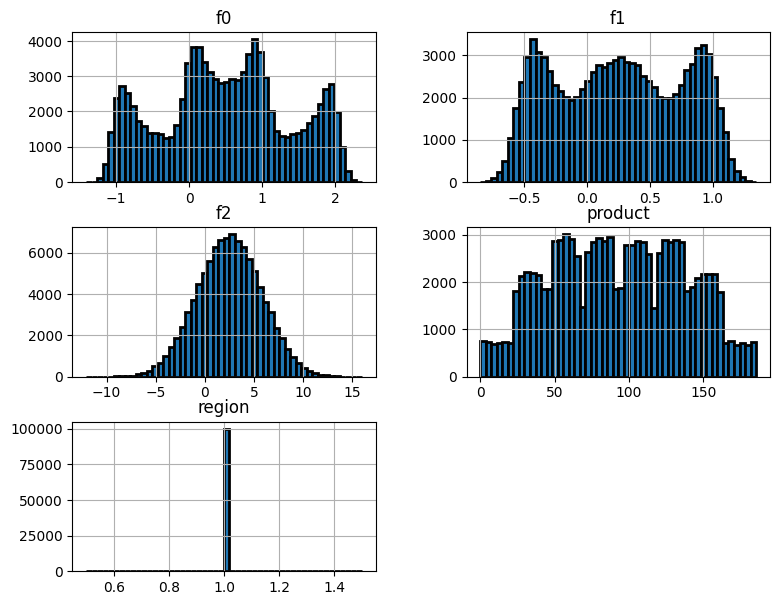

In [10]:
# Построим гистограмму признаков для df_1
df_1.hist(bins=50, figsize=(9, 7), edgecolor='black', linewidth=2)
plt.show()

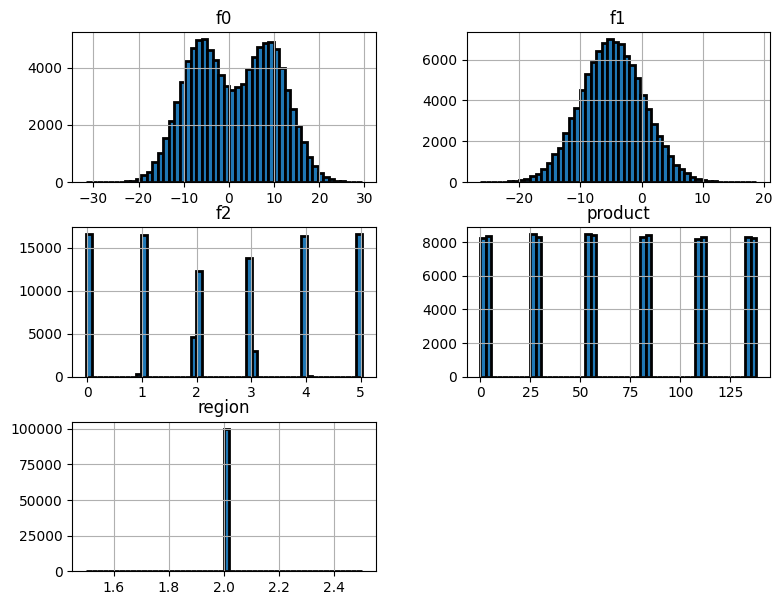

In [11]:
# Построим гистограмму признаков для df_2
df_2.hist(bins=50, figsize=(9, 7), edgecolor='black', linewidth=2)
plt.show()

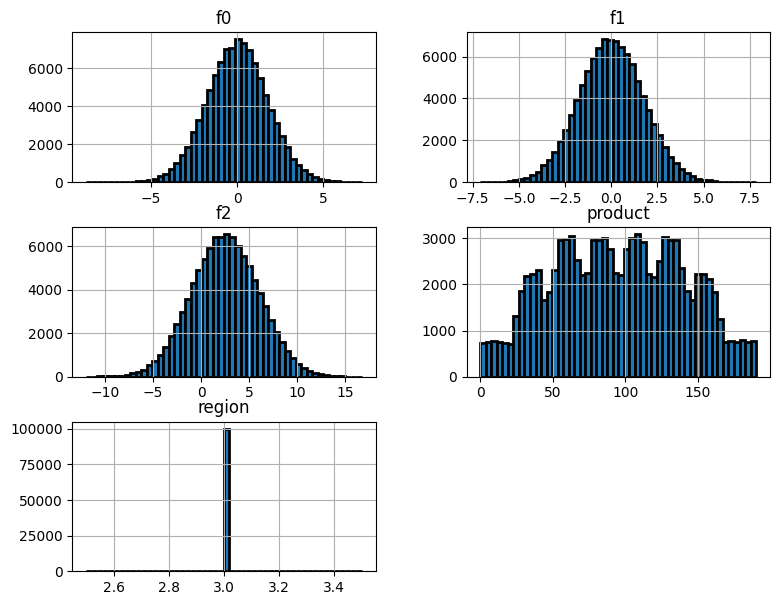

In [12]:
# Построим гистограмму признаков для df_3
df_3.hist(bins=50, figsize=(9, 7), edgecolor='black', linewidth=2)
plt.show()

### Краткий вывод

В первой части нашего исследования мы сохранили предоставленные нам данные по регионам в соответствующие переменные, проверили на отсутсвие явных пропусков и пропусков. Проверив данные на мультиколлинеарность, видим среднее положительное влияние признаков f2 и product в регионах 1 и 3, но сильное положительное влияние в регионе 2. Относительно региона 2 - это также проявляется и на гистограммах распределения.

## Обучение и проверка модели

### Создание функции обучения модели

In [13]:
# Примем значение аргумента random_state в переменной STATE
STATE = np.random.RandomState(1234)

def split_scale_learn(df):

    '''
        Функция принимает на вход датасет и производит с ним полный цикл,
         - разбиение на выборки,
         - масштабирование численных признаков,
         - обучение модели,
         - оценка качества модели
    '''

    # Делим данные на target и features
    target = df['product']
    features = df.drop(['id', 'product'], axis=1)

    # Делим данные на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
        features,
        target,
        test_size=0.25,
        random_state=STATE)

    # Масштабируем признаки
    numeric = ['f0', 'f1', 'f2']

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    pd.options.mode.chained_assignment = None

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])

    # Обучаем модель
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)

    # Оцениваем модель
    rmse = mean_squared_error(predicted, target_valid) ** .5

    return rmse, predicted, features_train, features_valid, target_valid

### Обучение модели

In [14]:
# Вызов функции и сохранение переменных для региона 1
rmse_1, predicted_1, features_1_train, features_1_valid, target_1_valid = split_scale_learn(df_1)

# Вызов функции и сохранение переменных для региона 2
rmse_2, predicted_2, features_2_train, features_2_valid, target_2_valid = split_scale_learn(df_2)

# Вызов функции и сохранение переменных для региона 3
rmse_3, predicted_3, features_3_train, features_3_valid, target_3_valid = split_scale_learn(df_3)

### Вывод результатов

In [15]:
print(f'Регион 1:\n')
print(f'\tКоличество строк в обучающей выборке: {features_1_train.shape[0]}, или {(len(features_1_train) / len(df_1)):.1%} от исходных данных')
print(f'\tКоличество строк в валидационной выборке: {features_1_valid.shape[0]}, или {(len(features_1_valid) / len(df_1)):.1%} от исходных данных')
print(f'\tСредний предсказанный запас сырья: {predicted_1.mean():.3f}')
print(f'\tСредний истинный запас сырья: {df_1["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse_1:.2f}')

print(f'\nРегион 2:\n')
print(f'\tКоличество строк в обучающей выборке: {features_2_train.shape[0]}, или {(len(features_2_train) / len(df_2)):.1%} от исходных данных')
print(f'\tКоличество строк в валидационной выборке: {features_2_valid.shape[0]}, или {(len(features_2_valid) / len(df_2)):.1%} от исходных данных')
print(f'\tСредний предсказанный запас сырья: {predicted_2.mean():.3f}')
print(f'\tСредний истинный запас сырья: {df_2["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse_2:.2f}')

print(f'\nРегион 3:\n')
print(f'\tКоличество строк в обучающей выборке: {features_3_train.shape[0]}, или {(len(features_3_train) / len(df_3)):.1%} от исходных данных')
print(f'\tКоличество строк в валидационной выборке: {features_3_valid.shape[0]}, или {(len(features_3_valid) / len(df_3)):.1%} от исходных данных')
print(f'\tСредний предсказанный запас сырья: {predicted_3.mean():.3f}')
print(f'\tСредний истинный запас сырья: {df_3["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse_3:.2f}')

Регион 1:

	Количество строк в обучающей выборке: 75000, или 75.0% от исходных данных
	Количество строк в валидационной выборке: 25000, или 25.0% от исходных данных
	Средний предсказанный запас сырья: 92.430
	Средний истинный запас сырья: 92.500
	RMSE модели: 37.56

Регион 2:

	Количество строк в обучающей выборке: 75000, или 75.0% от исходных данных
	Количество строк в валидационной выборке: 25000, или 25.0% от исходных данных
	Средний предсказанный запас сырья: 68.983
	Средний истинный запас сырья: 68.825
	RMSE модели: 0.89

Регион 3:

	Количество строк в обучающей выборке: 75000, или 75.0% от исходных данных
	Количество строк в валидационной выборке: 25000, или 25.0% от исходных данных
	Средний предсказанный запас сырья: 94.779
	Средний истинный запас сырья: 95.000
	RMSE модели: 40.12


### Анализ результатов

Во второй части исследования мы разбили исходные данные на обучающую и валидационную выборки. Вычислили показатели среднего предсказанного запаса сырья и оценили качество модели с помощью метрики RMSE. Данная метрика вычисляет квадратный корень из значения средней квадратичной ошибки, что позволяет оценивать величину ошибки в понятных единицах измерения.

Согласно предсказаниям построенных моделей для каждого региона, средний запас предсказанного сырья больше в третьем регионе - модель предсказала залежи в 94.916 тыс. баррелей. В первом регионе запасы сопоставимы - 92.43 тыс. баррелей. Третий регион показал самые низкие значения - 68.802 тыс. баррелей.

In [16]:
print('Количество уникальных значений запасов сырья в регионе:', df_1['product'].nunique())
print('Количество уникальных значений запасов сырья в регионе:', df_2['product'].nunique())
print('Количество уникальных значений запасов сырья в регионе:', df_3['product'].nunique())

Количество уникальных значений запасов сырья в регионе: 100000
Количество уникальных значений запасов сырья в регионе: 12
Количество уникальных значений запасов сырья в регионе: 100000


## Подготовка к расчёту прибыли

### Определим ключевые значения

In [17]:
BUDGET = 10000000000
POINTS = 500
POINTS_PER_BUDGET = 200
INCOME_PER_UNIT = 450000

### Определение величины запаса сырья для безубыточной разработки

In [18]:
# Бюджет на разработку скважины
COST_PER_UNIT = BUDGET / POINTS_PER_BUDGET

# Достаточный объем сырья для безубыточной разработки
LOSSLESS_POINT = COST_PER_UNIT / INCOME_PER_UNIT

print(f'Для безубыточной разработки одной скважины необходимо {round(LOSSLESS_POINT, 0)} тыс. баррелей')

Для безубыточной разработки одной скважины необходимо 111.0 тыс. баррелей


### Краткий вывод

Судя по данным полученным в третьей части исследования, для безубыточной разработки скважины необходим запас в 111 тыс. баррелей. В предыдущей части мы определили среднее предсказанное значение добычи нефти по регионам. Во всех трех регионах, средние показатели меньше безубыточных

## Расчёт прибыли и рисков

### Создание функции расчета прибыли

In [19]:
def profit(predictions, target):

    '''
        Функция принимает на вход набор предсказаний и целевого
        признака валидационной выборки каждого региона
        и производит расчет прибыли от строительства скважины
    '''
    # Отсортируем предсказанные данные по убыванию
    probs_sorted = pd.Series(predictions).sort_values(ascending=False)

    # Выберем 200 точек с самым высоким значением запасов нефти
    top_target = target[probs_sorted.index][:POINTS_PER_BUDGET]

    # Вычислим значение прибыли по этим точкам
    revenue = top_target.sum() * INCOME_PER_UNIT

    return revenue - BUDGET

### Создание функции расчета целевых показателей

In [20]:
def mean_rev_interval_risk(predictions, target):

    '''
        Функция применяет технику Bootstrap с 1000 выборок
        предсказанных значений по каждому региону
        для распределение прибыли
    '''

    values = []

    # Заведем цикл перебора для выборок Bootstrap
    for _ in range(1000):
        predictions_sample = pd.Series(predictions).sample(n=POINTS, replace=True, random_state=STATE)
        values.append(profit(predictions_sample, target.reset_index(drop=True)))

    # Запишем значение распределения выборок в объект Series
    values = pd.Series(values)

    # Определим целевые показатели
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    mean_revenue = sum(values) / len(values)
    risk_loss = len(values[values<0])/len(values)

    return mean_revenue, lower, upper, risk_loss, values

In [21]:
mean_1, lower_1, upper_1, risk_loss_1, values_1 = mean_rev_interval_risk(predicted_1, target_1_valid)
mean_2, lower_2, upper_2, risk_loss_2, values_2 = mean_rev_interval_risk(predicted_2, target_2_valid)
mean_3, lower_3, upper_3, risk_loss_3, values_3 = mean_rev_interval_risk(predicted_3, target_3_valid)

In [22]:
values_result = pd.DataFrame({'Регион 1': values_1,
                              'Регион 2': values_2,
                              'Регион 3': values_3})
values_result

,Регион 1,Регион 2,Регион 3
0,5.185387e+08,4.106971e+08,3.496152e+08
1,3.166419e+06,5.183650e+08,3.097591e+08
2,4.950823e+08,6.817639e+08,3.240679e+08
3,-1.109909e+07,2.422599e+08,5.249475e+08
4,5.127952e+08,6.439464e+08,5.648771e+08
...,...,...,...
995,2.377468e+08,6.560754e+08,5.096311e+08
996,5.461740e+08,4.834087e+08,5.039023e+08
997,4.578776e+08,4.327780e+08,2.053733e+08
998,3.576915e+08,7.238110e+08,8.418853e+07


### Определение показателей прибыли для региона 1

In [23]:
print('Регион 1:\n')
print(f'\tСредняя прибыль: {mean_1:.2f}')
print(f'\tДоверительный интервал: {lower_1:.2f} - {upper_1:.2f}')
print(f'\tРиск убытков: {risk_loss_1:.2%}')

Регион 1:

	Средняя прибыль: 392853884.51
	Доверительный интервал: -120448195.90 - 899077102.22
	Риск убытков: 6.10%


### Определение показателей прибыли для региона 2

In [24]:
print('Регион 2:\n')
print(f'\tСредняя прибыль: {mean_2:.2f}')
print(f'\tДоверительный интервал: {lower_2:.2f} - {upper_2:.2f}')
print(f'\tРиск убытков: {risk_loss_2:.2%}')

Регион 2:

	Средняя прибыль: 458572160.61
	Доверительный интервал: 65141235.38 - 858678931.73
	Риск убытков: 0.60%


### Определение показателей прибыли для региона 3

In [25]:
print('Регион 3:\n')
print(f'\tСредняя прибыль: {mean_3:.2f}')
print(f'\tДоверительный интервал: {lower_3:.2f} - {upper_3:.2f}')
print(f'\tРиск убытков: {risk_loss_3:.2%}')

Регион 3:

	Средняя прибыль: 381761274.44
	Доверительный интервал: -156487445.47 - 873879619.54
	Риск убытков: 7.80%


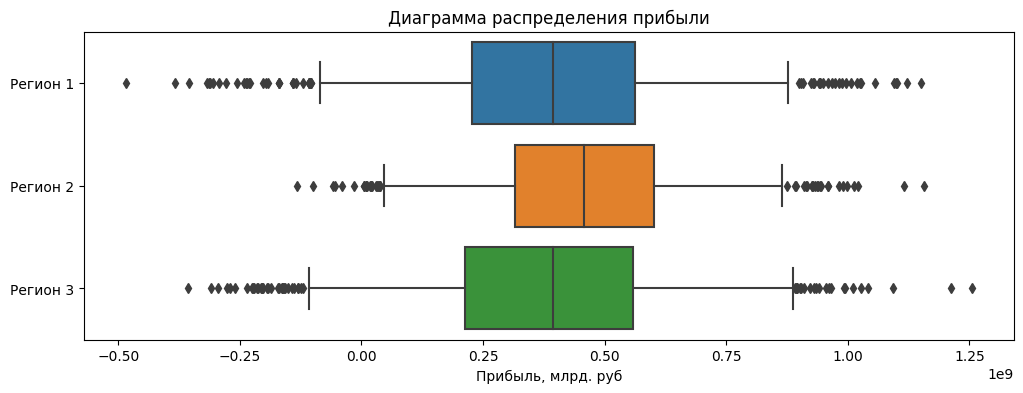

In [26]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=values_result, whis=0.95, orient='h')
plt.title('Диаграмма распределения прибыли')
plt.xlabel('Прибыль, млрд. руб')
plt.show();

### Краткий вывод

В результате расчетов получены следующие результаты:
    - Риск убытков во втором регионе - самый низкий и составляет 0.6%. В 1 и 3 регионе этот показатель составил 6.1% и 7.8%, соответственно
    - Средныы прибыль во втором регионе - самая высокая и составляет, примерно, 459 млн. рублей. В 1 и 3 регионе этот показатель составил 393 млн. и 382 млн. рублей, соответственно
    
***На основании этих данных, предлагаем остановиться на выборе региона №2 для строительства новых скважин***

## Вывод

В данном исследовании, на основании данных проб нефти из трех регионов нам нужно было решить, в каком из регионов наиболее эффективно бурить новую скважину.

В первой части исследования мы загрузили данные, предоставленные компанией и сохранили в соответствующие переменные, рассмотрели общую информацию о данных, произвели проверку данных на явные дубликаты и пропущенные значения.

Во второй части, при помощи созданный функции, произвели разделение датасетов на обучающие признаки (features) и целевой (target) признаки, масштабировали числовые признаки в обучающих выборках и обучили модели линейной регрессии по данным каждого региона. В результате работы модели получили следующие результаты о качестве модели: средний запас сырья в регионах 1 и 3 оказались, примерно, на одном уровне - 94430 и 94779 баррелей, соответственно, а в регионе 2 - 68983 баррелей. Однако, по метрике RMSE - лучший результат, как раз у региона 1 (0.89). Регоны  1 и 3 - 37.56 и 40.12, соответственно.

В третей части исследования мы определили ключевые значения и определили значение запасов для безубыточного строительства скважины - 111 тыс. баррелей -, что не соответсвтвует средним показателям по регионам.

В четвертой части, при помощи техники Bootstrap разделили предсказанные значения каждого региона на 1000 выборок по 500 скважин в каждой, чтобы определить распределение прибыли. Далее определили 200 самых прибыльных скважин в каждом регионе и для них вычислили среднюю прибыль, 95%-й доверительный интервал и риск убытков.

В результате полученных данных предложили регион для строительства скважины с наименьшим риском убытка. Таким регионом оказался регион 2 со значением доли убыточного строительства 0.6%